<a href="https://colab.research.google.com/github/GuangyiLiu123/Music-ML/blob/main/Polygence_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import librosa 
audio_data = 'atsol.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050
import IPython.display as ipd
ipd.Audio("atsol.wav")

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
import IPython.display as ipd
ipd.Audio("sample.wav")

In [3]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
plt.figure(figsize=(12, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
length = chromagram.shape[1]
a = 0
bflat = 0
b = 0
c = 0
csharp = 0
d = 0
eflat = 0
e = 0
f = 0
fsharp = 0
g = 0
aflat = 0
for i in range(int(length)):
  c = c+chromagram[0,i]
  csharp = csharp+chromagram[1,i]
  d = d+chromagram[2,i]
  eflat = eflat+chromagram[3,i]
  e=e+chromagram[4,i]
  f=f+chromagram[5,i]
  fsharp = fsharp + chromagram[6,i]
  g = g+chromagram[7,i]
  aflat = aflat+chromagram[8,i]
  a = a+chromagram[9,i]
  bflat = bflat+chromagram[10,i]
  b = b+chromagram[11,i]
notelengths = [c,csharp,d, eflat, e, f, fsharp, g, aflat, a, bflat, b]
organized = sorted(notelengths)


In [ ]:
topnotes = [organized[len(notelengths)-3],organized[len(notelengths)-2],organized[len(notelengths)-1] ]
keysig = "Chicken"
if (e in topnotes) and (b in topnotes):
  if (aflat>g):
    keysig = "E Major"
  else:
    keysig = "E Minor"
elif (g in topnotes) and (d in topnotes):
  if (b>bflat):
    keysig = "G Major"
  else:
    keysig = "G Minor"
elif (d in topnotes) and (a in topnotes):
  if (fsharp>f):
    keysig = "D Major"
  else:
    keysig = "D Minor"
elif (a in topnotes) and (e in topnotes):
  if (csharp>c):
    keysig = "A Major"
  else:
    keysig = "A Minor"
elif (c in topnotes) and (g in topnotes):
  if (e>eflat):
    keysig = "C Major"
  else:
    keysig = "C Minor"

elif (b in topnotes) and (fsharp in topnotes):
  if (eflat>d):
    keysig = "B Major"
  else:
    keysig = "B Minor"

elif (fsharp in topnotes) and (csharp in topnotes):
  if (bflat>a):
    keysig = "F Sharp Major"
  else:
    keysig = "F Sharp Minor"
elif (csharp in topnotes) and (aflat in topnotes):
  if (f>e):
    keysig = "C Sharp Major"
  else:
    keysig = "C Sharp Minor"
elif (f in topnotes) and (c in topnotes):
  if (a>aflat):
    keysig = "F Major"
  else:
    keysig = "F Minor"
elif (bflat in topnotes) and (f in topnotes):
  if (d>csharp):
    keysig = "BFlat Major"
  else:
    keysig = "BFlat Minor"
elif (eflat in topnotes) and (bflat in topnotes):
  if (g>fsharp):
    keysig = "EFlat Major"
  else:
    keysig = "EFlat Minor"
elif (aflat in topnotes) and (eflat in topnotes):
  if (c>b):
    keysig = "AFlat Major"
  else:
    keysig = "AFlat Minor"
print(keysig)

C Minor


In [ ]:
n = 0
for i in range(floor(length/400))

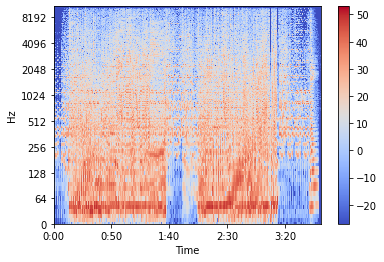

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
from keras.models  import Sequential
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./drive/My Drive/genres/{g}'):
        songname = f'./drive/My Drive/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

KeyboardInterrupt: ignored

<Figure size 576x576 with 0 Axes>

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./drive/My Drive/genres/{g}'):
        songname = f'./drive/My Drive/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9987
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9987
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9987
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9987
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9987
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9987
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9987
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9987
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9987
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9975
Epoch 11/100
7/7 [===========

In [ ]:
model.save('img_data/123')

INFO:tensorflow:Assets written to: img_data/123/assets
